In [1]:
import networkx as nx
import matplotlib as plt
import tikzplotlib
import pandas as pd


In [2]:
graph_data = pd.read_csv('/mnt/d/Egyetem/Routing Cikk/fast-failover/pearl-algo/topology_zoo_statistics.csv')
graph_data

,Unnamed: 0,NUM NODES,NUM EDGES,PEARL DEPTH,GRAPH NAME,NUM PEARLS
0,0,19,24,2,Aarnet.graphml,2
1,1,11,14,2,Abilene.graphml,2
2,2,23,31,1,Abvt.graphml,1
3,3,23,31,1,Aconet.graphml,2
4,4,25,30,0,Agis.graphml,0
...,...,...,...,...,...,...
238,238,92,96,2,VtlWavenet2011.graphml,2
239,239,30,33,0,WideJpn.graphml,0
240,240,24,34,1,Xeex.graphml,1
241,241,34,49,0,Xspedius.graphml,0


import pandas as pd
import matplotlib.pyplot as plt

def plot_columns_by_index(dataframe, col1, col2, col3):
    # Sort the DataFrame by col1
    sorted_df = dataframe.sort_values(by=col1).reset_index(drop=True)

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.scatter(sorted_df.index, sorted_df[col1], label=col1, marker='o', linestyle='-', color='b', s = 5)
    plt.scatter(sorted_df.index, sorted_df[col2], label=col2, marker='s', linestyle='--', color='r', s = 5)
    plt.scatter(sorted_df.index, sorted_df[col3], label=col3, marker='s', linestyle='--', color='y', s = 5)
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.title(f'{col1} and {col2} vs Index')
    plt.legend()
    plt.grid()
    plt.show()



In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import tikzplotlib

def plot_columns_by_index(dataframe, col1, col2, col3, col4, output_file="topology_zoo_pearl_data.tex"):
    # Sort the DataFrame by col1
    sorted_df = dataframe.sort_values(by=col1).reset_index(drop=True)

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.scatter(sorted_df.index, sorted_df[col1], label=col1, color='b', s=5)
    plt.scatter(sorted_df.index, sorted_df[col2], label=col2, color='r', s=5)
    plt.scatter(sorted_df.index, sorted_df[col3], label=col3, color='y', s=5)
    plt.scatter(sorted_df.index, sorted_df[col4], label=col4, color='k', s=5)
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.title(f'{col1}, {col2}, {col3} and {col4}')
    plt.legend()
    plt.grid()

    # Export the plot to a TikZ file
    tikzplotlib.save(output_file)

    plt.show()


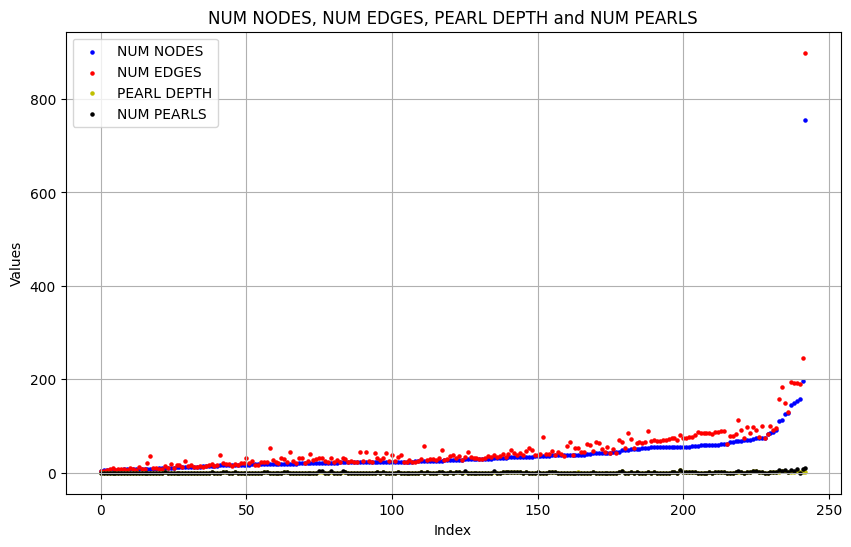

In [11]:
plot_columns_by_index(graph_data, 'NUM NODES', 'NUM EDGES', 'PEARL DEPTH', 'NUM PEARLS', output_file='topology_zoo_pearl_data.tex')